In [155]:
%matplotlib inline
from __future__ import division
import h5py
import phasekickstan as p
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import linalg
import glob
from collections import OrderedDict

def fname_to_h5pyFile(ordered_dict):
    return OrderedDict([(key, h5py.File(val, 'r')) for key, val in ordered_dict.items()])

ma4 = ma = np.ones(4)/4.0
ma2 = np.ones(2)/2.0

In [2]:
files = glob.glob('../results/tr-efm-pystan/*_single.h5')

In [3]:
live_1sun_sing = h5py.File('../results/tr-efm-pystan/151217-211131-1sun-df-dflive_single.h5', 'r')
live_1sun_doub = h5py.File('../results/tr-efm-pystan/151217-211131-1sun-df-dflive_doub.h5', 'r')

In [4]:
livedf_doub = OrderedDict([
        (0.1, '../results/tr-efm-pystan/151217-200319-p1sun-df-dflive_doub.h5' ),
        (0.3, '../results/tr-efm-pystan/151217-205007-p3sun-df-dflive_doub.h5' ),
        (  1, '../results/tr-efm-pystan/151217-211131-1sun-df-dflive_doub.h5'  ),
        ( 20, '../results/tr-efm-pystan/151217-234238-20sun-df-384-dflive_doub.h5' ),
        (100,'../results/tr-efm-pystan/151218-003450-100sun-784-dflive_doub.h5')
    ])

In [5]:
pk_doub = OrderedDict([
    (0.1, '../results/pk-efm-pystan/151217-201951-p1sun-phasekick_exp2_sq_nc.h5'),
    (0.3, '../results/pk-efm-pystan/151217-205912-p3sun-phasekick_exp2_sq_nc.h5'),
    (1,   '../results/pk-efm-pystan/151217-214045-1sun-phasekick_exp2_sq_nc.h5'),
    (20, '../results/pk-efm-pystan/151218-012858-20sun-phasekick-768_exp2_sq_nc.h5'),
    (100, '../results/pk-efm-pystan/151218-011055-100sun-phasekick-768_exp2_sq_nc.h5')
        ])

In [6]:
livedf_single = OrderedDict([(key, val.replace('_doub', '_single')) for key, val in livedf_doub.items()])
pk_single = OrderedDict([(key, val.replace('_exp2_sq_nc', '_exp_sq_nc').replace('pk-efm-pystan/', 'pk-efm-pystan/test11')) for key, val in pk_doub.items()])

In [7]:
livefh_single = fname_to_h5pyFile(livedf_single)
livefh_doub = fname_to_h5pyFile(livedf_doub)
pkfh_doub = fname_to_h5pyFile(pk_doub)
pkfh_single = fname_to_h5pyFile(pk_single)

In [9]:
mpl.rc('font', size=9)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(9, 5.5), )
for ((ax1, ax2), intens, dfsing, dfdoub, pksing, pkdoub) in zip(axes.T, livefh_single.keys(), livefh_single.values(), livefh_doub.values(), pkfh_single.values(), pkfh_doub.values()):
    df_sing = np.mean(p.fh_exp2df(dfsing), axis=0)
    df_doub = np.mean(p.fh_exp_doub2df(dfdoub), axis=0)
    ax1.plot(dfsing['data/t'][:], df_sing)
    ax1.plot(dfdoub['data/t'][:], df_doub)
    ax1.plot(dfsing['data/t'][:], dfsing['data/y'][:], alpha=0.3, color='m', zorder=0, marker='.', linestyle='', markeredgewidth=0)
    dfm_sing = np.mean(p.fh_exp2dphi(pksing), axis=0)/pksing['data/t'][:]
    dfm_doub = np.mean(p.fh_exp_doub2dphi(pkdoub), axis=0) / pkdoub['data/t'][:]
    ax2.plot(pksing['data/t'][:], dfm_sing)
    ax2.plot(pkdoub['data/t'][:], dfm_doub)
    
    if intens > 1:
        ax2.plot(signal.convolve(pksing['data/t'][:], ma, 'valid')[::4],
                 (signal.convolve(pksing['data/y'][:], ma, 'valid') / signal.convolve(pksing['data/t'][:], ma, 'valid'))[::4],
                 '.', alpha=0.5, zorder=0, color='m')
    else:
        ax2.plot(signal.convolve(pksing['data/t'][:], ma, 'valid')[::2],
                 (signal.convolve(pksing['data/y'][:], ma, 'valid') / signal.convolve(pksing['data/t'][:], ma, 'valid'))[::2],
                 '.', alpha=0.5, zorder=0, color='m')
    ax2.set_ylim(*ax1.get_ylim())

axes[0][0].set_xlim(-0.5, 50)
axes[0][1].set_xlim(-0.5, 35)

axes[1][0].set_xlim(-0.5, 50)
axes[1][1].set_xlim(-0.5, 10.5)

axes[0][2].set_xlim(-0.5, 15)
axes[1][2].set_xlim(-0.5, 8)


for ax in axes[:, 0:3].flatten():
    ax.set_ylim(-16, 1)

for ax in axes[:, 1:3].flatten():
    ax.set_yticklabels('')

for ax in axes[:, 3].flatten():
    ax.set_ylim(-21, 0)


# fig.savefig('ex.pdf', bbox_inches='tight', transparent=True)


In [15]:
mpl.rc('font', size=8)
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(7.25, 8.7), )
fig.subplots_adjust(hspace=0.2, wspace=0.3)
axes = axes.T
for ((ax1, ax2), intens, dfsing, dfdoub, pksing, pkdoub) in zip(axes.T, livefh_single.keys(), livefh_single.values(), livefh_doub.values(), pkfh_single.values(), pkfh_doub.values()):
    df_sing = np.mean(p.fh_exp2df(dfsing), axis=0)
    pL = 5
    pH = 95
    df_sing_L = np.percentile(p.fh_exp2df(dfsing), pL, axis=0)
    df_sing_H = np.percentile(p.fh_exp2df(dfsing), pH, axis=0)
    
    df_doub = np.mean(p.fh_exp_doub2df(dfdoub), axis=0)
    df_doub_L = np.percentile(p.fh_exp_doub2df(dfdoub), pL, axis=0)
    df_doub_H = np.percentile(p.fh_exp_doub2df(dfdoub), pH, axis=0)
    line, = ax1.plot(dfsing['data/t'][:], df_sing)
    ax1.fill_between(dfsing['data/t'][:], df_sing_L, df_sing_H, color=line.get_color(), alpha=0.3, linewidth=0)
    line, = ax1.plot(dfdoub['data/t'][:], df_doub)
    ax1.fill_between(dfdoub['data/t'][:], df_doub_L, df_doub_H, color=line.get_color(), alpha=0.3, linewidth=0)
    if intens > 1:
        alpha_1 = 0.6
    else:
        alpha_1 = 0.3
    ax1.plot(dfsing['data/t'][:], dfsing['data/y'][:], alpha=alpha_1, color='m', zorder=0, marker='.', linestyle='', markeredgewidth=0)
    
    dfm_sing = np.mean(p.fh_exp2dphi(pksing), axis=0)/pksing['data/t'][:]
    dfm_doub = np.mean(p.fh_exp_doub2dphi(pkdoub), axis=0) / pkdoub['data/t'][:]
    
    dfm_sing_L = np.percentile(p.fh_exp2dphi(pksing), pL, axis=0) / pksing['data/t'][:]
    dfm_sing_H = np.percentile(p.fh_exp2dphi(pksing), pH, axis=0) / pksing['data/t'][:]
    
    dfm_doub_L = np.percentile(p.fh_exp_doub2dphi(pkdoub), pL, axis=0) / pkdoub['data/t'][:]
    dfm_doub_H = np.percentile(p.fh_exp_doub2dphi(pkdoub), pH, axis=0) / pkdoub['data/t'][:]
     
    line, = ax2.plot(pksing['data/t'][:], dfm_sing)
    ax2.fill_between(pksing['data/t'][:], dfm_sing_L, dfm_sing_H, color=line.get_color(), alpha=0.3, linewidth=0)
    
    line, = ax2.plot(pkdoub['data/t'][:], dfm_doub)
    
    ax2.fill_between(pkdoub['data/t'][:], dfm_doub_L, dfm_doub_H, color=line.get_color(), alpha=0.3, linewidth=0)
    
    if intens > 1:
        ax2.plot(signal.convolve(pksing['data/t'][:], ma, 'valid')[::4],
                 (signal.convolve(pksing['data/y'][:], ma, 'valid') / signal.convolve(pksing['data/t'][:], ma, 'valid'))[::4],
                 '.', alpha=0.5, zorder=0, color='m')
    else:
        ax2.plot(signal.convolve(pksing['data/t'][:], ma2, 'valid')[::2],
                 (signal.convolve(pksing['data/y'][:], ma2, 'valid') / signal.convolve(pksing['data/t'][:], ma2, 'valid'))[::2],
                 '.', alpha=0.5, zorder=0, color='m')
        
    
    ax2.set_ylim(*ax1.get_ylim())

    

axes[0][0].set_ylabel("$\\delta f$ [Hz]")
axes[1][0].set_ylabel("$\\Delta \phi / t_{\\mathrm{p}} = \\langle \\delta f \\rangle$ [Hz]")

for ax in axes[0][1:].flatten():
    ax.set_ylabel("$\\delta f$ [Hz]")

for ax in axes[1][1:].flatten():
    ax.set_ylabel("$\\langle \\delta f \\rangle$ [Hz]")

tm = -0.25
xlims = [
    (tm, 45),
    (tm, 45),
    (tm, 15),
    (-0.06, 2.6),
    (-0.03, 1.41),
    (tm, 64),
    (tm, 10.5),
    (tm*0.8, 7.8), 
    (-0.03, 1.68),
    (-0.03, 1.4)
]

xticks = [
    np.arange(0, 41, 10),
    np.arange(0, 41, 10),
    np.arange(0, 16, 5),
    np.arange(0, 2.6, 0.5),
    np.arange(0, 1.4, 0.3),
    np.arange(0, 61, 10),
    np.arange(0, 11, 2),
    np.arange(0, 7, 2),
    np.arange(0, 1.6, 0.3),
    np.arange(0, 1.4, 0.3),
]

yticks = [
    np.arange(0, -15.1, -5),
    np.arange(0, -15.1, -5),
    np.arange(0, -15.1, -5),
    np.arange(0, -15.1, -5),
    np.arange(0, -41, -10),
    np.arange(0, -15.1, -5),
    np.arange(0, -12, -5),
    np.arange(0, -16, -5),
    np.arange(0, -16, -5),
    np.arange(0, -36, -10),
]

ylims = [
    (-15, 1),
    (-15, 1),
    (-17, 1),
    (-21, 1),
    (-41, 1),
    (-15, 1),
    (-12, 1),
    (-17, 1),
    (-18, 1),
    (-35, 1),
]

for xlim, xtick, ax in zip(xlims, xticks, axes.flatten()):
    ax.set_xlim(*xlim)
    ax.set_xticks(xtick)

for ylim, ytick, ax in zip(ylims, yticks, axes.flatten()):
    ax.set_ylim(*ylim)
    ax.set_yticks(ytick[::-1])


axes[0][-1].set_xlabel("Time $t$ [ms]")
axes[1][-1].set_xlabel("Pulse time $t_{\\mathrm{p}}$ [ms]")



# fig.savefig('exT.pdf', bbox_inches='tight', transparent=True)


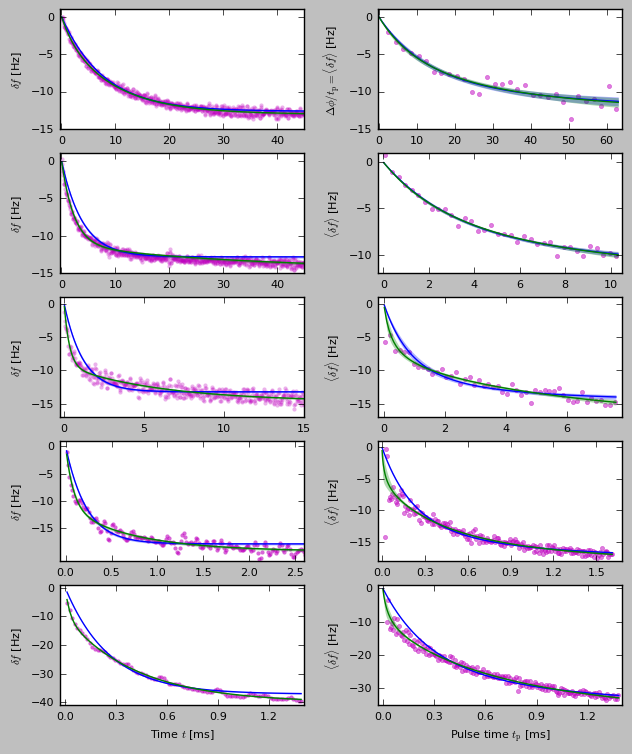

In [16]:
fig

In [17]:
t = livefh_single[1.0]['data/t'][:]
df = livefh_single[1.0]['data/y'][:]

In [18]:
# plt.plot(t, df)
# plt.plot(t, -13*(1.0 - 1.0/(t/0.33 + 1.0)))

In [19]:
plt.close('all')

In [33]:
# 20 sun data 
intens = 20
pksing = pkfh_single[intens]
pkdoub = pkfh_doub[intens]
ts = pksing['data/t'][:]
ts = ts.reshape(-1, 4)
ys = pksing['data/y'][:]
ys = ys.reshape(-1, 4)


# signal.convolve(pksing['data/t'][:], ma, 'valid')[::4],
#                  (signal.convolve(pksing['data/y'][:], ma, 'valid') / signal.convolve(pksing['data/t'][:], ma, 'valid'))[::4],
#                  '.', alpha=0.5, zorder=0, color='m')

In [78]:
def process_row(x, y):
    A = np.c_[x - np.mean(x), np.ones(x.size)]  # Linear fit
    mb, resid, rank, svds = linalg.lstsq(A, y)
    err = (resid / (x.size-2)) ** 0.5
    return np.mean(x), mb[1], err

def process_row_avg(x, y):
    A = np.c_[np.ones(x.size)]  # Linear fit
    mb, resid, rank, svds = linalg.lstsq(A, y)
    err = (resid / (x.size-1)) ** 0.5
    return np.mean(x), mb[0], err

In [79]:
tm = np.zeros(ys.shape[0])
ym = np.zeros(ys.shape[0])
yerr = np.zeros(ys.shape[0])
for i, (x, y) in enumerate(zip(ts, ys)):
    t_, y_, err_ = process_row(x, y)
    tm[i] = t_
    ym[i] = y_
    yerr[i] = err_
    

In [80]:
def process_data(f, ts, ys):
    tm = np.zeros(ys.shape[0])
    ym = np.zeros(ys.shape[0])
    yerr = np.zeros(ys.shape[0])
    for i, (x, y) in enumerate(zip(ts, ys)):
        t_, y_, err_ = f(x, y)
        tm[i] = t_
        ym[i] = y_
        yerr[i] = err_
    return tm, ym, yerr

In [129]:
y1_err = np.mean(p.sigma_sq(pkdoub), axis=0)
y0_err = np.mean(p.sigma_sq(pksing), axis=0)

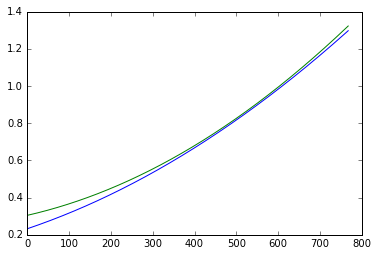

In [134]:
plt.plot(y1_err)
plt.plot(y0_err)

In [135]:
tm2, ym2, yerr2 = process_data(process_row_avg, ts, ys)

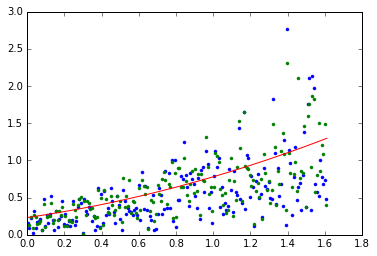

In [136]:
plt.plot(tm, yerr, '.')
plt.plot(tm2, yerr2, '.')
plt.plot(ts.flatten(), y1_err)

In [144]:
reduced_resids = (ys.flatten() - np.mean(p.fh_exp2dphi(pksing), axis=0)) / y0_err

In [149]:
reduced_resids2 = (ys.flatten() - np.mean(p.fh_exp_doub2dphi(pkdoub), axis=0)) / y1_err

In [140]:
np.dot(reduced_resids, reduced_resids) / (792-5)

0.96442905157230652

(-4, 4)

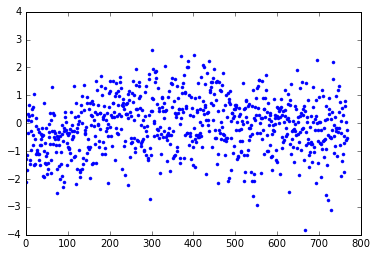

In [141]:
plt.plot((ys.flatten() - np.mean(p.fh_exp2dphi(pksing), axis=0)) / y0_err, 'b.')
plt.plot((ys.flatten() - np.mean(p.fh_exp2dphi(pksing), axis=0)) / y0_err, 'b.')
plt.ylim(-4, 4)

In [143]:
import seaborn.apionly

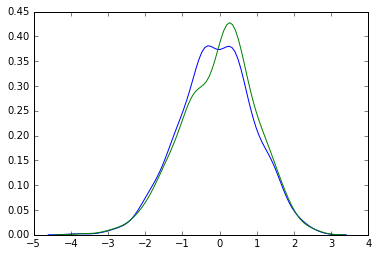

In [151]:
seaborn.kdeplot(reduced_resids)
seaborn.kdeplot(reduced_resids2)

In [160]:
from scipy import special

In [102]:
phi_fit = np.mean(p.exp2dphi(tm, pksing['params/df_inf'][:], pksing['params/tau']), 0)

(-0.03, 1.6)

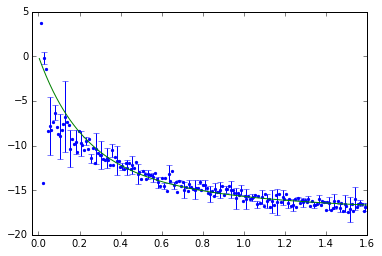

In [106]:
plt.scatter(tm, ym/tm, marker='.', color='b')
plt.errorbar(tm, ym/tm, yerr/tm, linestyle='', zorder=0, errorevery=3)
plt.plot(tm, phi_fit/tm)
resid = ym - phi_fit
plt.ylim(-20, 5)
plt.xlim(-0.03, 1.6)

In [ ]:
ys - 

In [108]:
np.dot(resid, np.dot(np.diag(yerr), resid)) / (ym.size - 2)

0.14539138035763652

In [34]:
np.mean(ys, axis=1)

array([ -4.75219011e-01,   4.64770049e-02,  -2.95070291e-01,
        -5.44422679e-03,  -5.26465476e-02,  -3.85738999e-01,
        -4.24672484e-01,  -5.17470896e-01,  -5.23834348e-01,
        -5.03446102e-01,  -6.98087335e-01,  -8.39309931e-01,
        -9.41169024e-01,  -9.30607855e-01,  -9.17469978e-01,
        -8.77919436e-01,  -1.01929927e+00,  -1.13467860e+00,
        -1.60455000e+00,  -1.51491213e+00,  -1.69748867e+00,
        -1.73246861e+00,  -2.01540780e+00,  -1.65316153e+00,
        -2.00786948e+00,  -2.12747455e+00,  -2.34136295e+00,
        -2.19077086e+00,  -2.49563432e+00,  -2.28465557e+00,
        -2.92800236e+00,  -2.71408319e+00,  -3.25902128e+00,
        -2.91072345e+00,  -3.12981343e+00,  -3.28988123e+00,
        -3.38883114e+00,  -3.63482571e+00,  -3.76905322e+00,
        -3.77519941e+00,  -3.93813825e+00,  -4.23736572e+00,
        -3.75628519e+00,  -4.45600033e+00,  -4.22922421e+00,
        -4.47578239e+00,  -4.57608557e+00,  -4.93178892e+00,
        -5.01445341e+00,

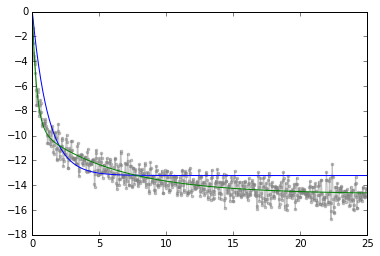

In [103]:

for df_func, ds in zip([p.fh_exp2df, p.fh_exp_doub2df], [live_1sun_sing, live_1sun_doub]):
    df = df_func(ds)
    dfm = np.mean(df, axis=0)
    plt.plot(ds['data']['t'][:], dfm)
plt.plot(ds['data']['t'], ds['data']['y'], color='0.5', marker='.', alpha=0.5, zorder=0)

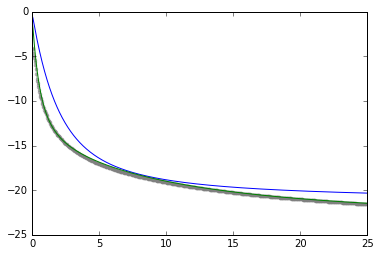

In [106]:
for df_func, ds in zip([p.fh_exp2df, p.fh_exp_doub2df], [live_1sun_sing, live_1sun_doub]):
    df = df_func(ds)
    dfm = np.mean(df, axis=0)
    plt.plot(ds['data']['t'][:], np.cumsum(dfm)/ds['data/t'][:]*0.05)
plt.plot(ds['data']['t'][:], np.cumsum(ds['data']['y'][:])/ds['data/t'][:] * 0.05, color='0.5', marker='.', alpha=0.5, zorder=0)

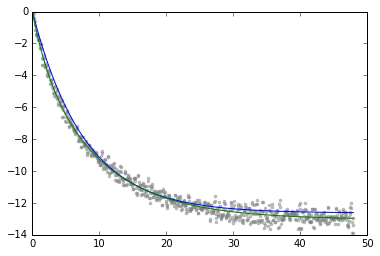

In [73]:
intens = 0.1

for df_func, ds in zip([p.fh_exp2df, p.fh_exp_doub2df], [livefh_single[intens], livefh_doub[intens]]):
    df = df_func(ds)
    dfm = np.mean(df, axis=0)
    plt.plot(ds['data']['t'][:], dfm)
plt.plot(ds['data']['t'], ds['data']['y'], color='0.5',marker='.',linestyle='', alpha=0.5, zorder=0)

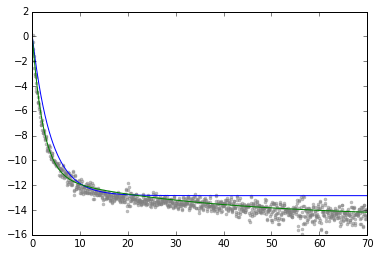

In [74]:
intens = 0.3

for df_func, ds in zip([p.fh_exp2df, p.fh_exp_doub2df], [livefh_single[intens], livefh_doub[intens]]):
    df = df_func(ds)
    dfm = np.mean(df, axis=0)
    plt.plot(ds['data']['t'][:], dfm)
plt.plot(ds['data']['t'], ds['data']['y'], color='0.5',marker='.',linestyle='', alpha=0.5, zorder=0)

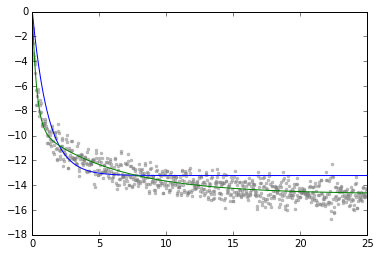

In [75]:
intens = 1.0

for df_func, ds in zip([p.fh_exp2df, p.fh_exp_doub2df], [livefh_single[intens], livefh_doub[intens]]):
    df = df_func(ds)
    dfm = np.mean(df, axis=0)
    plt.plot(ds['data']['t'][:], dfm)
plt.plot(ds['data']['t'], ds['data']['y'], color='0.5',marker='.',linestyle='', alpha=0.5, zorder=0)

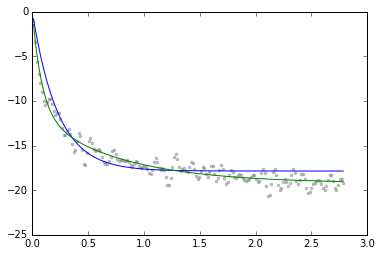

In [76]:
intens = 20.0

for df_func, ds in zip([p.fh_exp2df, p.fh_exp_doub2df], [livefh_single[intens], livefh_doub[intens]]):
    df = df_func(ds)
    dfm = np.mean(df, axis=0)
    plt.plot(ds['data']['t'][:], dfm)
plt.plot(ds['data']['t'], ds['data']['y'], color='0.5',marker='.',linestyle='', alpha=0.5, zorder=0)

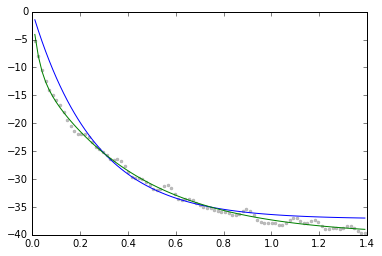

In [77]:
intens = 100.0

for df_func, ds in zip([p.fh_exp2df, p.fh_exp_doub2df], [livefh_single[intens], livefh_doub[intens]]):
    df = df_func(ds)
    dfm = np.mean(df, axis=0)
    plt.plot(ds['data']['t'][:], dfm)
plt.plot(ds['data']['t'], ds['data']['y'], color='0.5',marker='.',linestyle='', alpha=0.5, zorder=0)

(-45, 5)

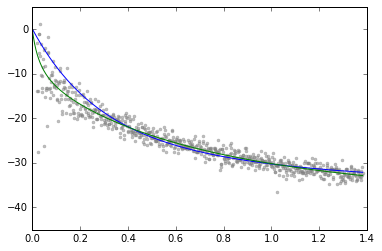

In [85]:
intens = 100.0

for df_func, ds in zip([p.fh_exp2dphi, p.fh_exp_doub2dphi], [pkfh_single[intens], pkfh_doub[intens]]):
    df = df_func(ds)
    dfm = np.mean(df, axis=0)
    plt.plot(ds['data']['t'][:], dfm/ds['data/t'][:])

plt.plot(ds['data']['t'][:], ds['data']['y'][:]/ds['data']['t'][:], color='0.5',marker='.',linestyle='', alpha=0.5, zorder=0)
plt.ylim(-45, 5)

(-20, 4)

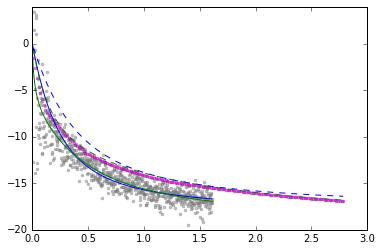

In [119]:
intens = 20.0

for df_func, (ds, ds2) in zip([p.fh_exp2dphi, p.fh_exp_doub2dphi], [(pkfh_single[intens], livefh_single[intens]),
                                                                    (pkfh_doub[intens], livefh_doub[intens])]):
    df = df_func(ds)
    dfm = np.mean(df, axis=0)
    line, = plt.plot(ds['data']['t'][:], dfm/ds['data/t'][:])
    df2 = df_func(ds2)
    dfm2 = np.mean(df2, axis=0)
    plt.plot(ds2['data/t'][:], dfm2/ds2['data/t'][:], color=line.get_color(), linestyle='--')
    
plt.plot(ds['data']['t'][:], ds['data']['y'][:]/ds['data']['t'][:], color='0.5',marker='.',linestyle='', alpha=0.5, zorder=0)
plt.plot(ds2['data']['t'][:], np.cumsum(ds2['data']['y'][:])/ds2['data']['t'][:] *np.mean(np.gradient(ds2['data']['t'][:])), color='m', marker='.',linestyle='', alpha=0.5, zorder=0)


plt.ylim(-20, 4)

(-36, 1)

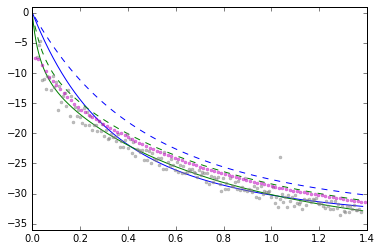

In [129]:
intens = 100.0
ma = np.ones(4)/4.0

for df_func, (ds, ds2) in zip([p.fh_exp2dphi, p.fh_exp_doub2dphi], [(pkfh_single[intens], livefh_single[intens]),
                                                                    (pkfh_doub[intens], livefh_doub[intens])]):
    df = df_func(ds)
    dfm = np.mean(df, axis=0)
    line, = plt.plot(ds['data']['t'][:], dfm/ds['data/t'][:])
    df2 = df_func(ds2)
    dfm2 = np.mean(df2, axis=0)
    plt.plot(ds2['data/t'][:], dfm2/ds2['data/t'][:], color=line.get_color(), linestyle='--')

plt.plot(signal.convolve(ds['data']['t'][:], ma)[::4], signal.convolve(ds['data']['y'][:]/ds['data']['t'][:], ma)[::4], color='0.5',marker='.',linestyle='', alpha=0.5)
plt.plot(ds2['data']['t'][:], np.cumsum(ds2['data']['y'][:])/ds2['data']['t'][:] *np.mean(np.gradient(ds2['data']['t'][:])), color='m', marker='.',linestyle='', alpha=0.5)


plt.ylim(-36, 1)

(0, 0.5)

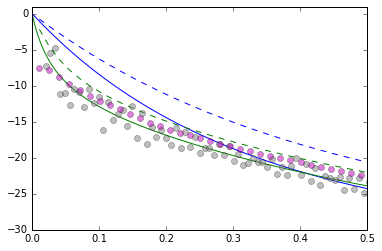

In [136]:
intens = 100.0
ma = np.ones(4)/4.0

for df_func, (ds, ds2) in zip([p.fh_exp2dphi, p.fh_exp_doub2dphi], [(pkfh_single[intens], livefh_single[intens]),
                                                                    (pkfh_doub[intens], livefh_doub[intens])]):
    df = df_func(ds)
    dfm = np.mean(df, axis=0)
    line, = plt.plot(ds['data']['t'][:], dfm/ds['data/t'][:])
    df2 = df_func(ds2)
    dfm2 = np.mean(df2, axis=0)
    plt.plot(ds2['data/t'][:], dfm2/ds2['data/t'][:], color=line.get_color(), linestyle='--')

plt.plot(signal.convolve(ds['data']['t'][:], ma)[::4], signal.convolve(ds['data']['y'][:]/ds['data']['t'][:], ma)[::4], color='0.5', marker='o', linestyle='', alpha=0.5)
plt.plot(ds2['data']['t'][:], np.cumsum(ds2['data']['y'][:])/ds2['data']['t'][:] * np.mean(np.gradient(ds2['data']['t'][:])), color='m', marker='o', linestyle='', alpha=0.5)


plt.ylim(-30, 1)
plt.xlim(0, 0.5)

In [117]:
intens = 100.0

for df_func, (ds, ds2) in zip([p.fh_exp2dphi, p.fh_exp_doub2dphi], [(pkfh_single[intens], livefh_single[intens]),
                                                                    (pkfh_doub[intens], livefh_doub[intens])]):
    df = df_func(ds)
    dfm = np.mean(df, axis=0)
    line, = plt.plot(ds['data']['t'][:], dfm/ds['data/t'][:])
    df2 = df_func(ds2)
    dfm2 = np.mean(df2, axis=0)
    plt.plot(ds2['data/t'][:], dfm2/ds2['data/t'][:], color=line.get_color(), linestyle='--')

plt.plot(signal.convolve(ds['data']['t'][:], ma)[::4], signal.convolve(ds['data']['y'][:]/ds['data']['t'][:], ma)[::4], color='0.5',marker='.',linestyle='', alpha=0.5, zorder=0)
plt.plot(ds2['data']['t'][:], np.cumsum(ds2['data']['y'][:])/ds2['data']['t'][:] *np.mean(np.gradient(ds2['data']['t'][:])), color='m', marker='.',linestyle='', alpha=0.5, zorder=0)


plt.ylim(-40, 4)

0.015

(-17, 5)

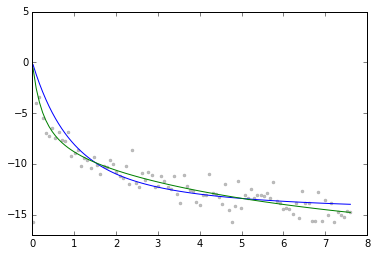

In [90]:
intens = 1.0

for df_func, ds in zip([p.fh_exp2dphi, p.fh_exp_doub2dphi], [pkfh_single[intens], pkfh_doub[intens]]):
    df = df_func(ds)
    dfm = np.mean(df, axis=0)
    plt.plot(ds['data']['t'][:], dfm/ds['data/t'][:])

plt.plot(ds['data']['t'][:], ds['data']['y'][:]/ds['data']['t'][:], color='0.5',marker='.',linestyle='', alpha=0.5, zorder=0)
plt.ylim(-17, 5)

(-13, 2)

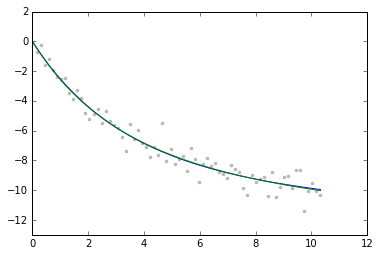

In [94]:
intens = 0.3

for df_func, ds in zip([p.fh_exp2dphi, p.fh_exp_doub2dphi], [pkfh_single[intens], pkfh_doub[intens]]):
    df = df_func(ds)
    dfm = np.mean(df, axis=0)
    plt.plot(ds['data']['t'][:], dfm/ds['data/t'][:])

plt.plot(ds['data']['t'][:], ds['data']['y'][:]/ds['data']['t'][:], color='0.5',marker='.',linestyle='', alpha=0.5, zorder=0)
plt.ylim(-13, 2)

(-13, 1)

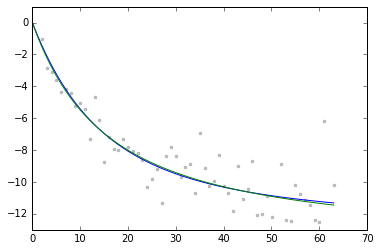

In [96]:
intens = 0.1

for df_func, ds in zip([p.fh_exp2dphi, p.fh_exp_doub2dphi], [pkfh_single[intens], pkfh_doub[intens]]):
    df = df_func(ds)
    dfm = np.mean(df, axis=0)
    plt.plot(ds['data']['t'][:], dfm/ds['data/t'][:])

plt.plot(ds['data']['t'][:], ds['data']['y'][:]/ds['data']['t'][:], color='0.5',marker='.',linestyle='', alpha=0.5, zorder=0)
plt.ylim(-13, 1)

In [99]:
np.mean(pkfh_single[intens]['params/tau'][:])

8.467391

In [101]:
np.mean(pkfh_single[intens]['params/df_inf'][:]) * np.exp(-1)

-4.8114567930073289